### Домашняя работа 5 Гурский 

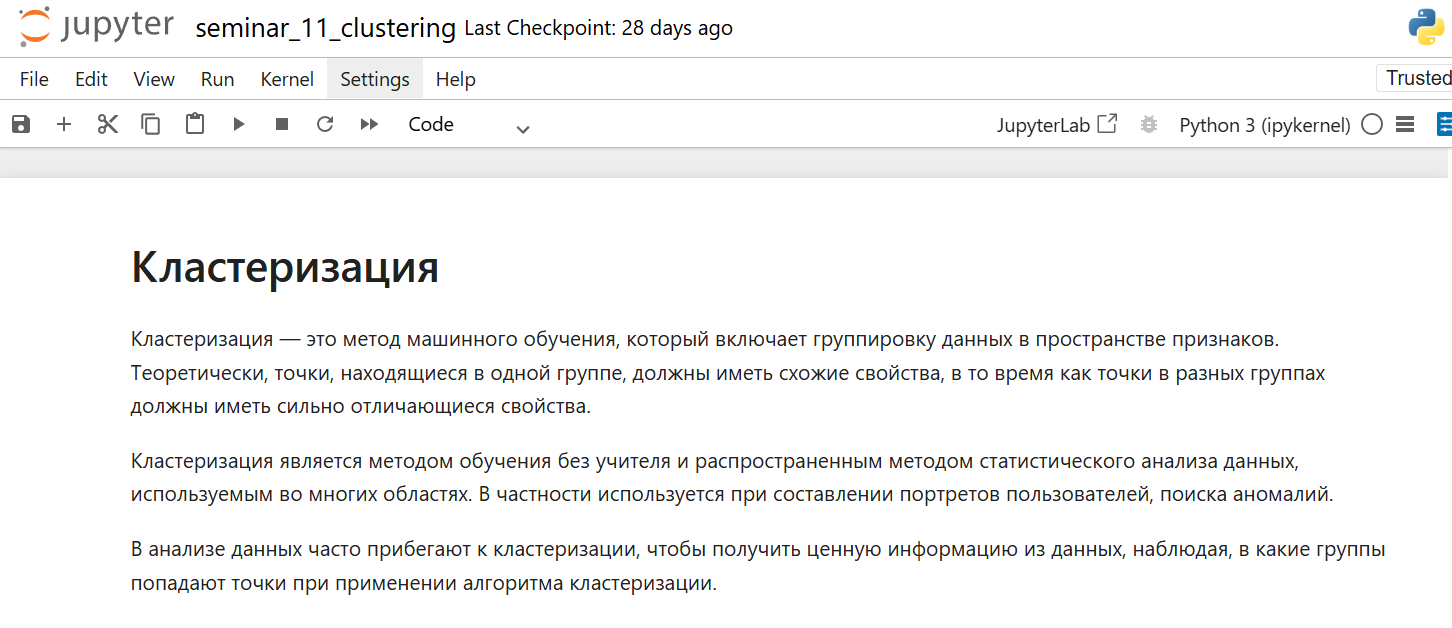

# Часть 1: K-Means
## Кластеризация исполнителей по жанрам

В этом задании вы попробуете кластеризовать исполнителей по жанрам на основе данных о прослушивании.

В матрице sample_matrix по строкам стоят пользователи, а по столбцам - исполнители.

Для каждой пары (пользователь,исполнитель) в таблице стоит число - доля (процент) прослушивания этого исполнителя выбранным пользователем.

## Импорт библиотек, загрузка данных

In [7]:
import pandas as pd

In [102]:
# !pip install openpyxl

In [104]:
ratings = pd.read_excel(
    "./sample_matrix.xlsx",
    engine='openpyxl'
    )

In [105]:
ratings.head()

,user,the beatles,radiohead,deathcab for cutie,coldplay,modest mouse,sufjan stevens,dylan. bob,red hot clili peppers,pink fluid,...,municipal waste,townes van zandt,curtis mayfield,jewel,lamb,michal w. smith,群星,agalloch,meshuggah,yellowcard
0,0,NaN,0.020417,NaN,NaN,NaN,NaN,NaN,0.030496,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,0.184962,0.024561,NaN,NaN,0.136341,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,0.028635,NaN,NaN,NaN,0.024559,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0.043529,0.086281,0.034590,0.016712,0.015935,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Задание

Транспонируем матрицу ratings, чтобы по строкам стояли исполнители.

In [108]:
ratings = ratings.T

In [109]:
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
user,0.000000,1.000000,2.000000,3.0,4.000000,5.000000,6.0,7.0,8.000000,9.000000,...,4990.000000,4991.0,4992.000000,4993.000000,4994.000000,4995.000000,4996.0,4997.000000,4998.0,4999.000000
the beatles,NaN,NaN,NaN,NaN,0.043529,NaN,NaN,NaN,0.093398,0.017621,...,NaN,NaN,0.121169,0.038168,0.007939,0.017884,NaN,0.076923,NaN,NaN
radiohead,0.020417,0.184962,NaN,NaN,0.086281,0.006322,NaN,NaN,NaN,0.019156,...,0.017735,NaN,NaN,NaN,0.011187,NaN,NaN,NaN,NaN,NaN
deathcab for cutie,NaN,0.024561,0.028635,NaN,0.034590,NaN,NaN,NaN,NaN,0.013349,...,0.121344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027893
coldplay,NaN,NaN,NaN,NaN,0.016712,NaN,NaN,NaN,NaN,NaN,...,0.217175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
ratings.index

Index(['user', 'the beatles', 'radiohead', 'deathcab for cutie', 'coldplay',
       'modest mouse', 'sufjan stevens', 'dylan. bob', 'red hot clili peppers',
       'pink fluid',
       ...
       'municipal waste', 'townes van zandt', 'curtis mayfield', 'jewel',
       'lamb', 'michal w. smith', '群星', 'agalloch', 'meshuggah', 'yellowcard'],
      dtype='object', length=1001)

Выкиньте строку под названием `user`.

In [112]:
# ваш код здесь

ratings.drop(labels='user', inplace=True)
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
the beatles,NaN,NaN,NaN,NaN,0.043529,NaN,NaN,NaN,0.093398,0.017621,...,NaN,NaN,0.121169,0.038168,0.007939,0.017884,NaN,0.076923,NaN,NaN
radiohead,0.020417,0.184962,NaN,NaN,0.086281,0.006322,NaN,NaN,NaN,0.019156,...,0.017735,NaN,NaN,NaN,0.011187,NaN,NaN,NaN,NaN,NaN
deathcab for cutie,NaN,0.024561,0.028635,NaN,0.034590,NaN,NaN,NaN,NaN,0.013349,...,0.121344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027893
coldplay,NaN,NaN,NaN,NaN,0.016712,NaN,NaN,NaN,NaN,NaN,...,0.217175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
modest mouse,NaN,NaN,NaN,NaN,0.015935,NaN,NaN,NaN,NaN,0.030437,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Вопрос для Quiz

Сколько строк осталось в матрице ratings?

In [114]:
ratings.info

<bound method DataFrame.info of                         0         1         2     3         4         5     \
the beatles              NaN       NaN       NaN   NaN  0.043529       NaN   
radiohead           0.020417  0.184962       NaN   NaN  0.086281  0.006322   
deathcab for cutie       NaN  0.024561  0.028635   NaN  0.034590       NaN   
coldplay                 NaN       NaN       NaN   NaN  0.016712       NaN   
modest mouse             NaN       NaN       NaN   NaN  0.015935       NaN   
...                      ...       ...       ...   ...       ...       ...   
michal w. smith          NaN       NaN       NaN   NaN       NaN       NaN   
群星                       NaN       NaN       NaN   NaN       NaN       NaN   
agalloch                 NaN       NaN       NaN   NaN       NaN       NaN   
meshuggah                NaN       NaN       NaN   NaN       NaN       NaN   
yellowcard               NaN       NaN       NaN   NaN       NaN       NaN   

                    6     7    

Заполните пропуски нулями.

In [116]:
df = ratings

In [278]:
df.drop(['Cluster'], axis=1, inplace=True)
df

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
the beatles,0.000000,0.000000,0.000000,0.0,0.000118,0.000000,0.0,0.0,0.000254,0.000048,...,0.000000,0.0,0.00033,0.000104,0.000022,0.000049,0.0,0.000209,0.0,0.000000
radiohead,0.000086,0.000780,0.000000,0.0,0.000364,0.000027,0.0,0.0,0.000000,0.000081,...,0.000075,0.0,0.00000,0.000000,0.000047,0.000000,0.0,0.000000,0.0,0.000000
deathcab for cutie,0.000000,0.000188,0.000219,0.0,0.000264,0.000000,0.0,0.0,0.000000,0.000102,...,0.000927,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000213
coldplay,0.000000,0.000000,0.000000,0.0,0.000139,0.000000,0.0,0.0,0.000000,0.000000,...,0.001801,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
modest mouse,0.000000,0.000000,0.000000,0.0,0.000136,0.000000,0.0,0.0,0.000000,0.000259,...,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
michal w. smith,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
群星,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
agalloch,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
meshuggah,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000


In [281]:
# Заменим Nan на ноль
# доля пропусков в датафрейме
print(df.isna().mean(axis=1))

the beatles           0.0
radiohead             0.0
deathcab for cutie    0.0
coldplay              0.0
modest mouse          0.0
                     ... 
michal w. smith       0.0
群星                    0.0
agalloch              0.0
meshuggah             0.0
yellowcard            0.0
Length: 1000, dtype: float64


In [283]:
# заменим на нули
df.fillna(0, inplace=True)
df

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
the beatles,0.000000,0.000000,0.000000,0.0,0.000118,0.000000,0.0,0.0,0.000254,0.000048,...,0.000000,0.0,0.00033,0.000104,0.000022,0.000049,0.0,0.000209,0.0,0.000000
radiohead,0.000086,0.000780,0.000000,0.0,0.000364,0.000027,0.0,0.0,0.000000,0.000081,...,0.000075,0.0,0.00000,0.000000,0.000047,0.000000,0.0,0.000000,0.0,0.000000
deathcab for cutie,0.000000,0.000188,0.000219,0.0,0.000264,0.000000,0.0,0.0,0.000000,0.000102,...,0.000927,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000213
coldplay,0.000000,0.000000,0.000000,0.0,0.000139,0.000000,0.0,0.0,0.000000,0.000000,...,0.001801,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
modest mouse,0.000000,0.000000,0.000000,0.0,0.000136,0.000000,0.0,0.0,0.000000,0.000259,...,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
michal w. smith,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
群星,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
agalloch,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
meshuggah,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000


Нормализуйте данные при помощи `normalize`.

In [286]:
from sklearn.preprocessing import normalize
import numpy as np

# нормализуем данные и разберемся с массивом numpy
X_norm = normalize(df.to_numpy(), 
         norm='l2', # чтобы сохранить направление векторов
         axis=1
                  )

# Вернем обратно в датафрейм
df_norm = pd.DataFrame(X_norm, columns=df.columns, index=df.index)
df = df_norm
df

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
the beatles,0.000000,0.000000,0.000000,0.0,0.012054,0.000000,0.0,0.0,0.025864,0.004880,...,0.000000,0.0,0.033554,0.010569,0.002199,0.004952,0.0,0.021302,0.0,0.000000
radiohead,0.009348,0.084688,0.000000,0.0,0.039505,0.002894,0.0,0.0,0.000000,0.008771,...,0.008120,0.0,0.000000,0.000000,0.005122,0.000000,0.0,0.000000,0.0,0.000000
deathcab for cutie,0.000000,0.017278,0.020144,0.0,0.024333,0.000000,0.0,0.0,0.000000,0.009391,...,0.085361,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.019622
coldplay,0.000000,0.000000,0.000000,0.0,0.011129,0.000000,0.0,0.0,0.000000,0.000000,...,0.144628,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
modest mouse,0.000000,0.000000,0.000000,0.0,0.010260,0.000000,0.0,0.0,0.000000,0.019597,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
michal w. smith,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
群星,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
agalloch,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
meshuggah,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000


Примените KMeans с 5ю кластерами на преобразованной матрице (сделайте fit, а затем вычислите кластеры при помощи predict).

In [289]:
df.dtypes

0       float64
1       float64
2       float64
3       float64
4       float64
         ...   
4995    float64
4996    float64
4997    float64
4998    float64
4999    float64
Length: 5000, dtype: object

In [291]:
from sklearn.cluster import KMeans

# Зададим количество кластеров - 5
kmeans = KMeans(n_clusters=5,
                random_state=42)

# Обучитм модель
kmeans.fit(df)


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [293]:
# df.drop(['Cluster'], axis=1, inplace=True)
df.dtypes

0       float64
1       float64
2       float64
3       float64
4       float64
         ...   
4995    float64
4996    float64
4997    float64
4998    float64
4999    float64
Length: 5000, dtype: object

In [295]:
# добавим кластеры в df
df['Cluster'] = kmeans.labels_
df.dtypes

0          float64
1          float64
2          float64
3          float64
4          float64
            ...   
4996       float64
4997       float64
4998       float64
4999       float64
Cluster      int32
Length: 5001, dtype: object

In [336]:
# выведем распределение по кластерам
df['Cluster'].value_counts()


Cluster
4    486
1    162
3    140
2    133
0     79
Name: count, dtype: int64

Выведите на экран центры кластеров (центроиды)

In [302]:
# координаты центров
centroids_df = (kmeans.cluster_centers_)
print(centroids_df)

[[ 1.67830066e-03 -4.33680869e-19  1.21266299e-04 ... -4.33680869e-19
   0.00000000e+00 -8.67361738e-19]
 [ 1.88589225e-03  1.06654937e-04  8.09463797e-04 ...  2.68938484e-03
   0.00000000e+00  1.19757379e-03]
 [ 3.55821439e-04  1.44240237e-04  1.73721732e-03 ...  1.59066890e-04
   5.16646974e-03  4.29001462e-04]
 [-1.30104261e-18  1.60551391e-03  1.92730597e-03 ...  8.36063816e-03
   0.00000000e+00 -1.08420217e-18]
 [ 2.14071913e-03  1.93800900e-03  1.67549440e-03 ...  3.78204679e-04
   1.58093924e-03  3.39174746e-03]]


Для каждого кластера найдем топ-10 исполнителей, наиболее близких к центроидам соотвествующего кластера.

Схожесть исполнителей будем считать по косинусной мере (spatial.distance.cosine).

## Quiz

Вычислите расстояние между "the beatles" и "coldplay". Ответ округлите до сотых.


In [305]:
# Данные без кластеров
features = df.drop(columns='Cluster')

In [307]:
features.dtypes

0       float64
1       float64
2       float64
3       float64
4       float64
         ...   
4995    float64
4996    float64
4997    float64
4998    float64
4999    float64
Length: 5000, dtype: object

In [323]:
from scipy.spatial.distance import cosine 

# векторы исполнителей
vec_1 = df.loc['the beatles'].values
vec_2 = df.loc['coldplay'].values

# расстояние между исполнителями
distance = cosine(vec_1, vec_2)

print(f"Косинусное расстояние: {distance:.2f}")

Косинусное расстояние: 0.31


Вывод: Вектора похожи, но совпадают не полностью

Ниже для вашего удобства написана функция, принимающая на вход:
* np.array points - все точки кластера
* pt - центроид кластера
* K = 10 - число
Функция возвращает K индексов объектов (строк в массиве points), ближайших к центроиду.

In [326]:
def pClosest(points, pt, K=10):
    ind = [i[0] for i in sorted(enumerate(points), key=lambda x: spatial.distance.cosine(x[1], pt))]

    return ind[:K]

Примените функцию pClosest (или придумайте свой подход) и выведите для каждого кластера названия топ-10 исполнителей, ближайших к центроиду.

In [329]:
from scipy.spatial import distance

def pClosest(points, pt, K=10):
    ind = [i[0] for i in sorted(enumerate(points), key=lambda x: distance.cosine(x[1], pt))]
    return ind[:K]

for cluster_number in range(5):
    # точки кластера
    cluster_df = features[df['Cluster'] == cluster_number]
    cluster_points = cluster_df.values

    # центроид
    center = kmeans.cluster_centers_[cluster_number]

    # получаем индексы топ-10 близких
    top_indices = pClosest(cluster_points, center, K=10)

    # восстанавливаем имена по индексам
    top_names = cluster_df.iloc[top_indices].index.tolist()

    print(f"\nКластер {cluster_number} — топ 10 исполнителей:")
    for name in top_names:
        print(" -", name)



Кластер 0 — топ 10 исполнителей:
 - nas
 - jay-z
 - kanye west
 - lupe the gorilla
 - a tribe called quest
 - the roots featuring d'angelo
 - gangstarr
 - little brother
 - lil' wayne
 - murs and 9th wonder

Кластер 1 — топ 10 исполнителей:
 - fall out boy
 - the all-americian rejects
 - paramore
 - kelly clarkson
 - john mayer
 - the fray
 - maroon5
 - dashboard confesssional
 - somethings corporate
 - coldplay

Кластер 2 — топ 10 исполнителей:
 - brand new
 - blink-182
 - alkaline trio
 - against me!
 - underoath
 - descendents
 - new found glory
 - less than jake
 - thrice
 - chiodos

Кластер 3 — топ 10 исполнителей:
 - the beatles
 - the rolling stones
 - dylan. bob
 - who
 - led zeppelin.
 - miles davis.
 - simon and garfunkel
 - young, neil
 - pink fluid
 - velvet underground

Кластер 4 — топ 10 исполнителей:
 - radiohead
 - the arcade fire
 - the shins
 - sufjan stevens
 - belle and sebastian
 - broken social scene
 - the pixies
 - animal collective
 - modest mouse
 - spoon


## Quiz

Проинтерпретируйте результат. Что можно сказать о смысле кластеров?

### Ответ

В результате кластеризации исполнителей по музыкальным признакам, мы получили 5 кластеров. Каждый из них объединяет исполнителей, максимально похожих по структуре характеристик (по жанру, направлению в музыке).
Важно было использовать нормализацию L2  чтобы сравнить направления векторов исполнителей.

# Часть 2: сравнение алгоритмов кластеризации

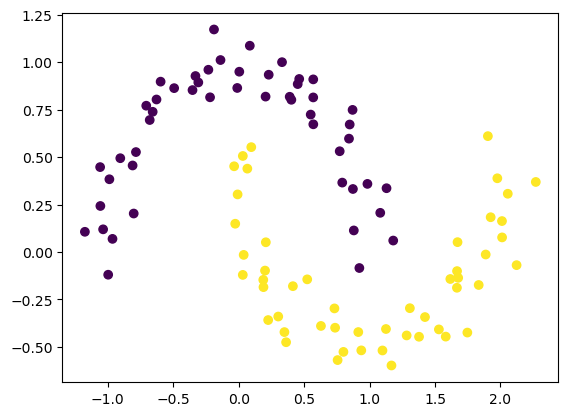

In [38]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_moons

data = make_moons(n_samples=100, noise=0.1, random_state=42)

X = data[0]
y = data[1]

plt.scatter(X[:,0], X[:,1], c=y)

Далее вы попробуете разные кластеризации для поиска кластеров. Также замеряйте время работы каждого метода.

Попробуйте найти кластеры при помощи KMeans

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


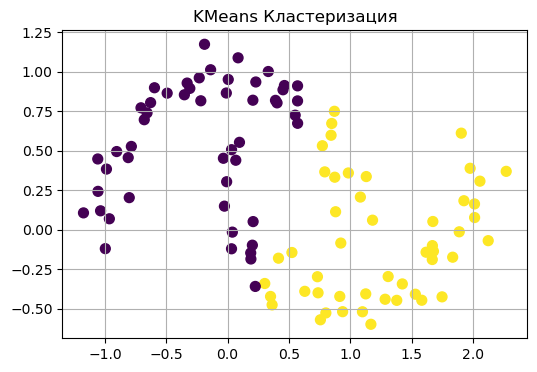

Время работы: 0.3413 сек


In [4]:
# ваш код здесь
from sklearn.cluster import KMeans
import time

# Засечем время
start = time.time()

# Обучаем модель на данных X
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

end = time.time()

# Визуализация результата
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.title("KMeans Кластеризация")
plt.grid(True)
plt.show()

print(f"Время работы: {end - start:.4f} сек")


## Quiz

Подберите $\varepsilon$ и min_samples в DBSCAN, чтобы наилучшим образом найти кластеры.
Ищите гиперпараметры из диапазонов:
* eps in [0.05, 0.1, 0.2, 0.28, 0.3, 0.32]
* min_samples in [4, 5, 6, 7]

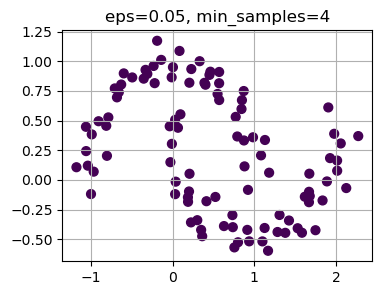

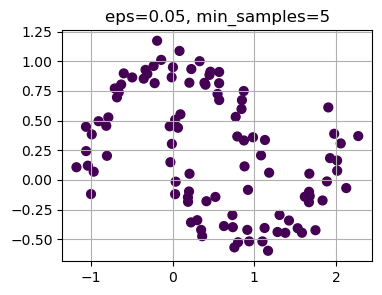

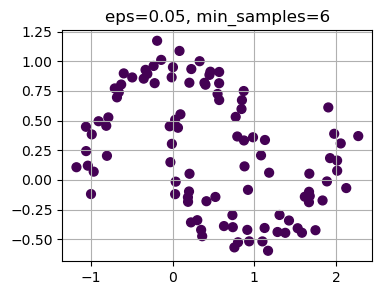

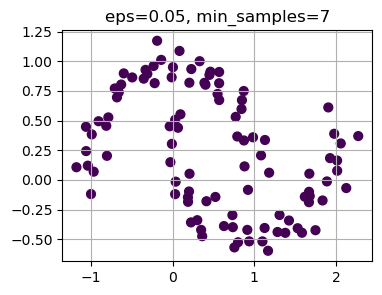

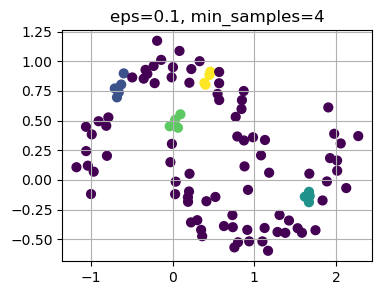

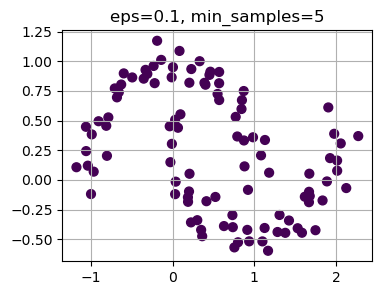

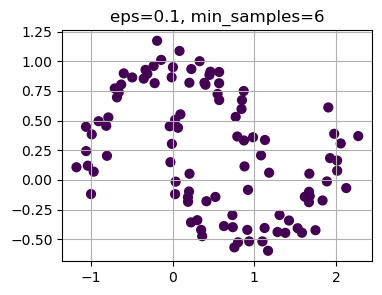

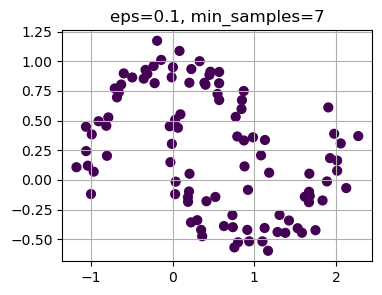

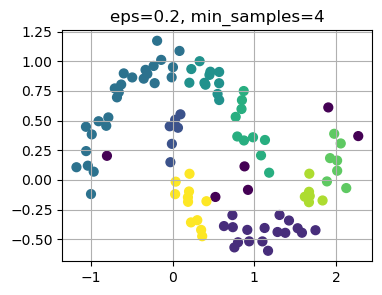

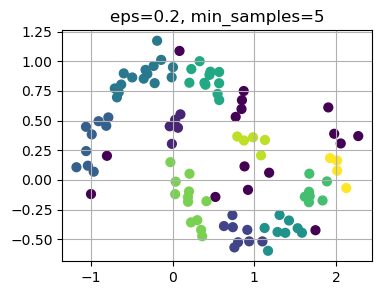

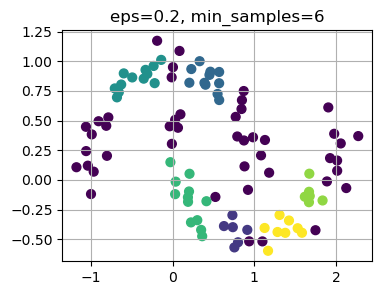

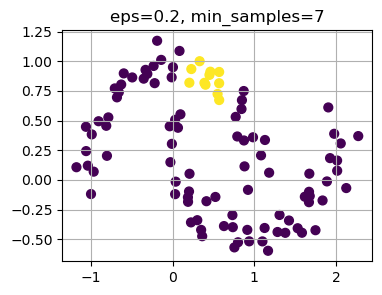

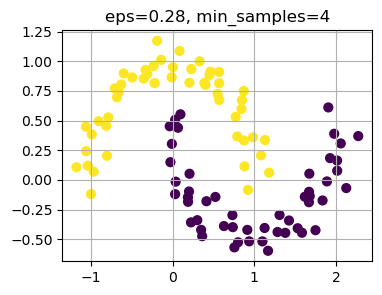

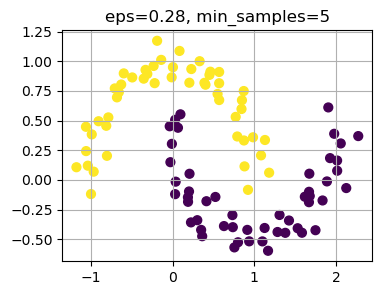

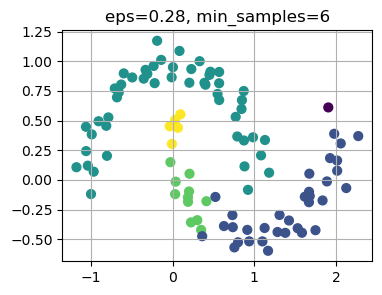

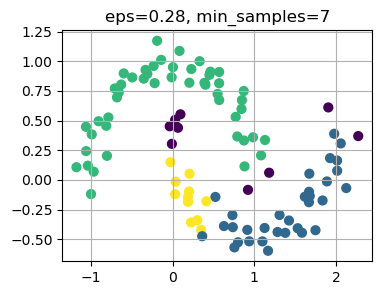

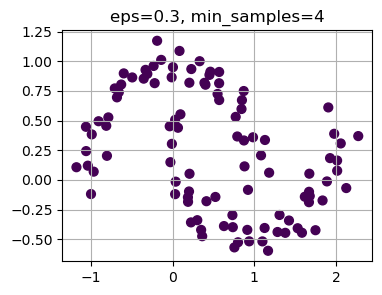

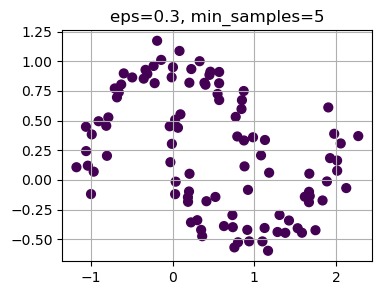

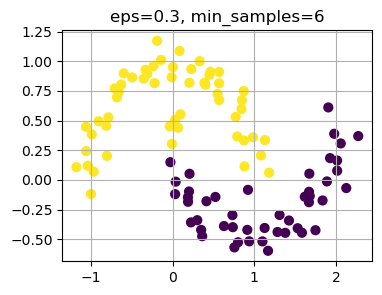

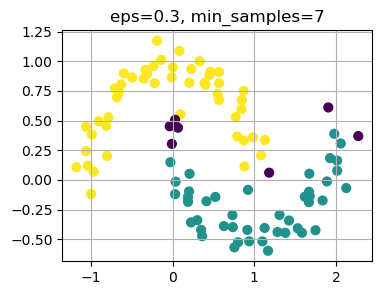

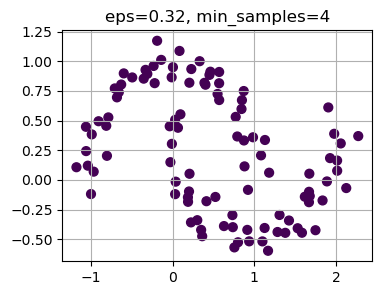

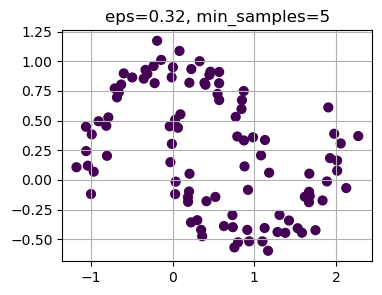

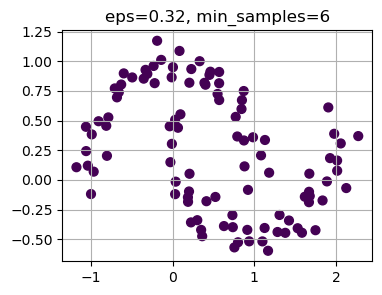

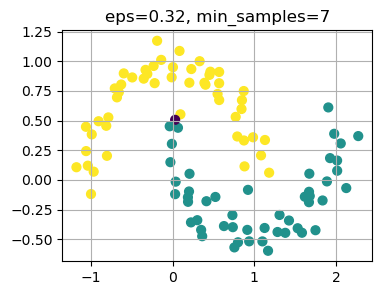

In [6]:
# ваш код здесь
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

eps_values = [0.05, 0.1, 0.2, 0.28, 0.3, 0.32]
min_samples_values = [4, 5, 6, 7]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)

        plt.figure(figsize=(4, 3))
        plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=40)
        plt.title(f"eps={eps}, min_samples={min_samples}")
        plt.grid(True)
        plt.show()


## Quiz

Используйте иерархическую кластеризацию для поиска кластеров.
Задайте в методе 2 кластера. Подберите гиперпараметр linkage из списка ['ward', 'complete', 'average', 'single'], дающий наилучший результат.

In [22]:
# Установим переменную окружения, чтобы избежать утечки памяти на Windows
import os
os.environ["OMP_NUM_THREADS"] = "1"

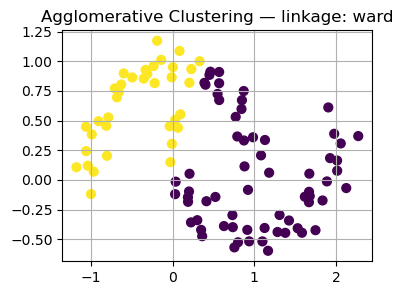

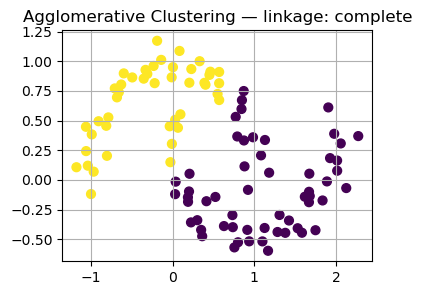

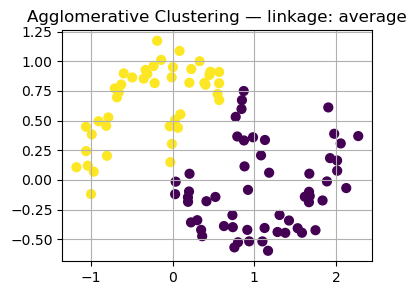

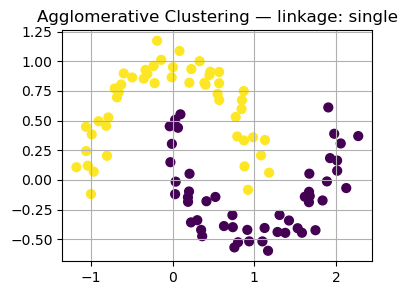

In [24]:
# ваш код здесь
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Список вариантов linkage — способов измерения расстояния между кластерами
linkages = ['ward', 'complete', 'average', 'single']

# Пробегаемся по всем вариантам
for link in linkages:

    # Метод 'ward' работает только с евклидовым расстоянием и не требует параметра metric
    if link == 'ward':
        model = AgglomerativeClustering(n_clusters=2, linkage=link)
    else:
        # Для остальных методов нужно явно указать метрику расстояния
        model = AgglomerativeClustering(n_clusters=2, linkage=link, metric='euclidean')

    # Обучаем модель и получаем метки кластеров
    labels = model.fit_predict(X)

    # Визуализируем результат кластеризации
    plt.figure(figsize=(4, 3))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=40)
    plt.title(f"Agglomerative Clustering — linkage: {link}")
    plt.grid(True)
    plt.show()


## Quiz

Попробуйте найти кластеры при помощи спектральной кластеризации.
Задайте 2 кластера, affinity='nearest_neighbors'. Подберите гиперпараметр n_neighbors из диапазона [1,2,...,19], чтобы добиться наилучшего результата.

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


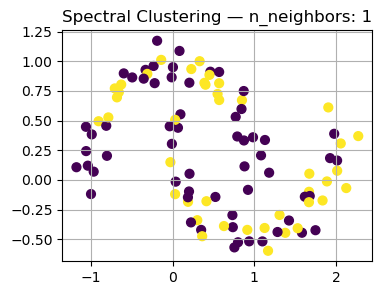

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


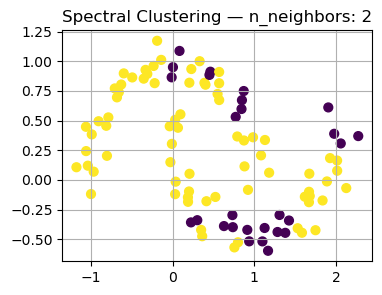

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


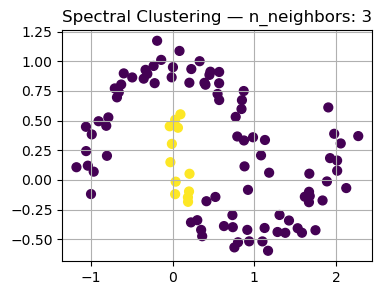

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


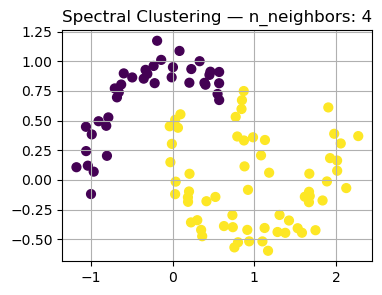

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


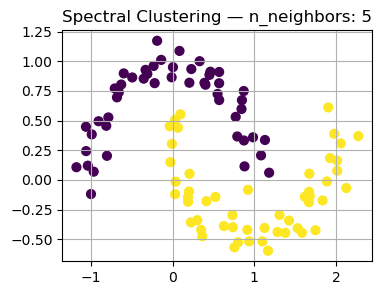

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


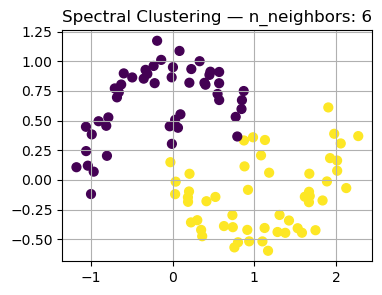

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


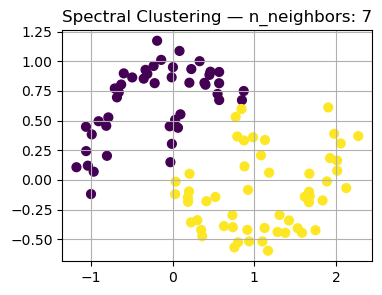

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


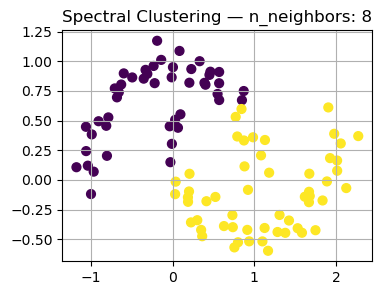

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


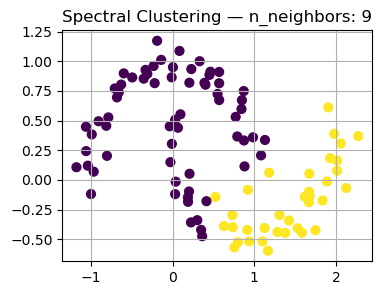

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


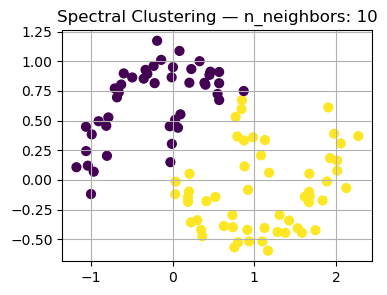

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


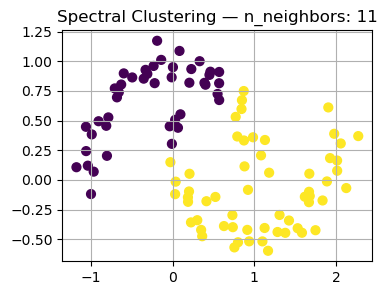

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


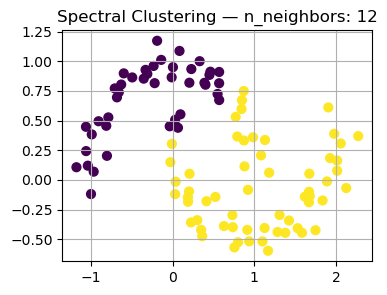

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


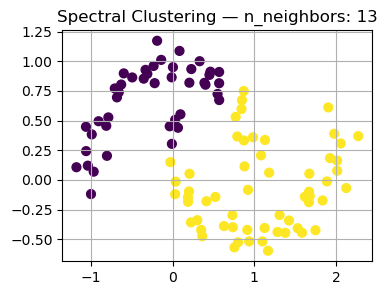

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


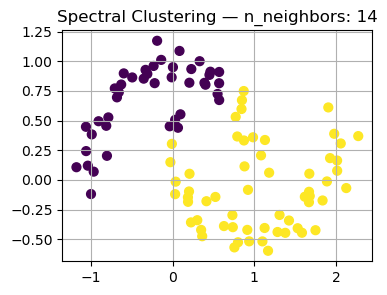

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


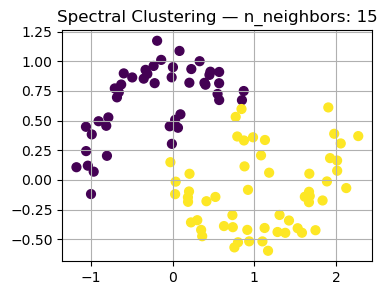

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


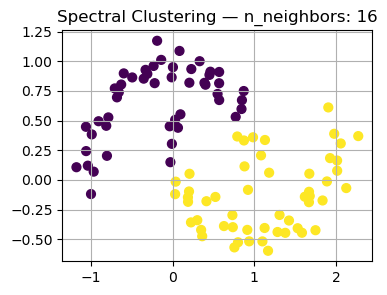

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


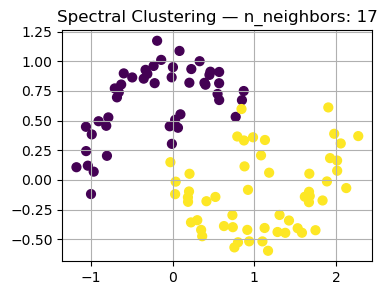

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


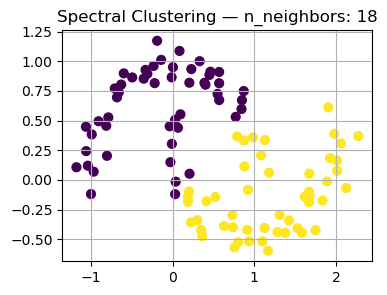

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


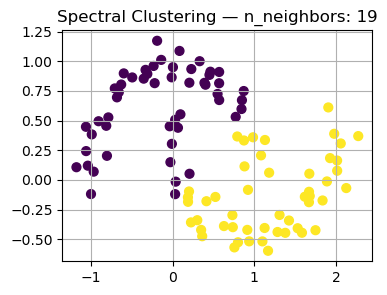

In [34]:
# ваш код здесь
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt

# Перебираем значения количества соседей
for k in range(1, 20):  # от 1 до 19 включительно
    model = SpectralClustering(n_clusters=2,
                               affinity='nearest_neighbors',
                               n_neighbors=k,
                               assign_labels='kmeans',
                               random_state=42)

    # Обучаем модель и получаем предсказания
    labels = model.fit_predict(X)

    # Отрисовка результатов
    plt.figure(figsize=(4, 3))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=40)
    plt.title(f"Spectral Clustering — n_neighbors: {k}")
    plt.grid(True)
    plt.show()


## Quiz

Сделайте выводы: какой метод сработал лучше других? какой метод сработал быстрее? есть ли метод, наилучший и по качеству, и по времени одновременно?

### Вывод по сравнению:


- **KMeans** — самый быстрый, но не распознаёт сложные формы кластеров. Подходит только для простых (шарообразных) групп.
- **DBSCAN** — наилучшее качество: учитывает форму, устойчив к шуму, не требует задания числа кластеров. Лучший выбор в задачах со сложной структурой.
- **Agglomerative Clustering** — даёт хорошие результаты при правильной настройке linkage, но работает медленнее.
- **Spectral Clustering** — обеспечивает высокое качество, особенно на сложных формах, но сильно проигрывает по скорости. Подходит для небольших выборок.

**Итог:**  
**DBSCAN** показал лучший результат в балансе между качеством кластеризации и скоростью работы.
